# Tarea 1: High dimensional Inference
## Python
### Isidoro Garcia 

En esta tarea pondrán en práctica los conceptos de High Dimensional Inference y Regresión. La base de datos muestra las compras de helados Ben & Jerry. Cada fila es una compra. Cada columna es una característica del helado comprado o de la persona que compró. 


### Cosas que aprendí
`pd.read_csv` lees un csv

`np.shape(data)`= `dim(data)`

`data.quantity` | `data['quantity']` = `data$quantity` 

`data["quantity"]` `pull(data %>% select(quantity))`

`data.quantity.value_counts()` = `data %>% group_by(quantity) %>% tally()`

`data.apply(n_distinct)` = `map_dbl(base %>% select_all(), ~n_distinct(.)))`

En una pandas Series, son como vectores con nombres. 
`index` es el equivalente a `names` 

Para hacer conditional replace de algo usas `data.loc`: `data.loc[condition, columna] = valor_a_asignar`

Para hacer *estadisticas descriptivas* hacemos `summary_statistics(data) = data.describe()`

`data.index` es literalment el `row_number` de la base

`data.select_dtypes(include/exclude = np.number)` es una manera de seleccionar columnas por tipo

`data = data[~pd.isnull(data.tv_items)]` Es para quitar filas donde suceda la condicion

`data = data.drop(['female_head_birth', 'male_head_birth'], axis = 1)` Para quitar una columa o varias 

`%who` te deja ver todo lo que cargaste a memoria

## Limpieza de Datos

Carga la base de BenAndJerry.csv 

In [1]:
import pandas as pd
import math
import numpy as np
import datetime as dt
from plotnine import ggplot, aes, geom_point, geom_line, geom_col, geom_histogram, geom_smooth , geom_bar, geom_boxplot, labs, coord_flip, facet_wrap, theme_bw
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
ls 'Bases input/'

BenAndJerry.csv


In [3]:
data = pd.read_csv('Bases input/BenAndJerry.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

###  1. Cuales son las columnas de la base?

In [5]:
# Vector de columnas
cols = np.column_stack(data)
cols = data.columns
cols

Index(['quantity', 'price_paid_deal', 'price_paid_non_deal', 'coupon_value',
       'promotion_type', 'size1_descr', 'flavor_descr', 'formula_descr',
       'household_id', 'household_size', 'household_income',
       'age_of_female_head', 'age_of_male_head',
       'age_and_presence_of_children', 'male_head_employment',
       'female_head_employment', 'male_head_education',
       'female_head_education', 'marital_status', 'male_head_occupation',
       'female_head_occupation', 'household_composition', 'race',
       'hispanic_origin', 'region', 'scantrack_market_identifier',
       'fips_state_code', 'fips_county_code', 'type_of_residence',
       'kitchen_appliances', 'tv_items', 'female_head_birth',
       'male_head_birth', 'household_internet_connection'],
      dtype='object')

In [6]:
# Dimensiones
print(np.shape(cols)) # 34 columnas 
dim = np.shape(data) # 
dim = data.shape # el vector de dimensiones 
dim[0] # el primer elemento

(34,)


21974

In [7]:
# Que me muestre todo
pd.set_option('display.max_columns', None)

In [8]:
data['quantity']
data[['quantity', 'price_paid_deal']]
data.head()

,quantity,price_paid_deal,price_paid_non_deal,coupon_value,promotion_type,size1_descr,flavor_descr,formula_descr,household_id,household_size,household_income,age_of_female_head,age_of_male_head,age_and_presence_of_children,male_head_employment,female_head_employment,male_head_education,female_head_education,marital_status,male_head_occupation,female_head_occupation,household_composition,race,hispanic_origin,region,scantrack_market_identifier,fips_state_code,fips_county_code,type_of_residence,kitchen_appliances,tv_items,female_head_birth,male_head_birth,household_internet_connection
0,2,6.82,0.00,1.0,2.0,16.0 MLOZ,CAKE BATTER,REGULAR,2001456,2,21,0,6,9,9,0,4,0,4,12,NaN,3,1,2,2,16.0,39,35,5,1,2.0,NaN,10/1/61,1
1,1,3.50,0.00,0.0,1.0,16.0 MLOZ,VAN CARAMEL FUDGE,REGULAR,2001456,2,21,0,6,9,9,0,4,0,4,12,NaN,3,1,2,2,16.0,39,35,5,1,2.0,NaN,10/1/61,1
2,1,3.50,0.00,0.0,1.0,16.0 MLOZ,VAN CARAMEL FUDGE,REGULAR,2001456,2,21,0,6,9,9,0,4,0,4,12,NaN,3,1,2,2,16.0,39,35,5,1,2.0,NaN,10/1/61,1
3,1,0.00,3.00,0.0,NaN,16.0 MLOZ,W-N-C-P-C,REGULAR,2001637,1,27,9,0,9,0,9,0,3,2,12,12.0,5,1,2,4,NaN,30,13,1,4,3.0,10/1/36,NaN,2
4,1,0.00,3.99,0.0,NaN,16.0 MLOZ,AMERICONE DREAM,REGULAR,2002791,3,21,9,9,9,9,9,5,3,1,12,12.0,1,1,2,3,14.0,13,59,1,7,3.0,10/1/29,10/1/27,1


### 2. A qué nivel está la base? Esto es, cuál es la variable que define la base de manera única. Si no la hay, crea una y muestra que es única a nivel de la base (Muestra el código)


In [9]:
np.shape(np.unique(data['race']))

(4,)

In [10]:
# Contando uniques por columna 

# Definiendo la funcion: pre
np.shape(np.unique(data['race']))

# Definiendo una funcion
def n_distinct(x): 
    a = np.shape(np.unique(x))
    return a[0]

# Aplico la funcion a una columna 
n_distinct(data.quantity)

13

In [11]:
# Contando numericas  
unicos_cols = data.select_dtypes(include = [np.number]).apply(n_distinct)
print(unicos_cols)

# Ninguna de las numerics tiene es el id
unicos_cols[unicos_cols == dim[0]]


quantity                           13
price_paid_deal                   562
price_paid_non_deal               575
coupon_value                      198
promotion_type                      5
household_id                     6385
household_size                      9
household_income                   19
age_of_female_head                 10
age_of_male_head                   10
age_and_presence_of_children        8
male_head_employment                5
female_head_employment              5
male_head_education                 7
female_head_education               7
marital_status                      4
male_head_occupation               12
female_head_occupation             13
household_composition               7
race                                4
hispanic_origin                     2
region                              4
scantrack_market_identifier        53
fips_state_code                    49
fips_county_code                  178
type_of_residence                   7
kitchen_appl

Series([], dtype: int64)

In [12]:
# Seleccionando no numericas 
unicos_cols_str = data.select_dtypes(exclude = [np.number]).columns
print(unicos_cols_str)

data.select_dtypes(exclude = [np.number]).head()


Index(['size1_descr', 'flavor_descr', 'formula_descr', 'female_head_birth',
       'male_head_birth'],
      dtype='object')


,size1_descr,flavor_descr,formula_descr,female_head_birth,male_head_birth
0,16.0 MLOZ,CAKE BATTER,REGULAR,NaN,10/1/61
1,16.0 MLOZ,VAN CARAMEL FUDGE,REGULAR,NaN,10/1/61
2,16.0 MLOZ,VAN CARAMEL FUDGE,REGULAR,NaN,10/1/61
3,16.0 MLOZ,W-N-C-P-C,REGULAR,10/1/36,NaN
4,16.0 MLOZ,AMERICONE DREAM,REGULAR,10/1/29,10/1/27


#### Creando una variable id 

In [13]:
# Creando el id unico
data['id'] = list(range(1, dim[0]+1))

a = data.index

# Checando la unicidad
print(n_distinct(data.id))
n_distinct(a)
print(a)

21974
RangeIndex(start=0, stop=21974, step=1)


### 3. Que variables tienen valores vacíos? Haz una tabla con el porcentaje de vacíos para las columnas que tengan al menos una observación vacía

In [14]:
missings = data.isnull().mean()*100
missings = missings[missings>0]
print(missings)

promotion_type                 59.069810
female_head_occupation         10.316738
scantrack_market_identifier    18.512788
tv_items                        0.154728
female_head_birth              10.316738
male_head_birth                24.196778
dtype: float64


### 4. Haz algo con los valores vacíos (Se deben reemplazar por algún valor? Eliminar de la base?). Justifica tu respuesta.

In [15]:
np.shape(missings)[0]

6

In [16]:
# Nombres 
missings.index

Index(['promotion_type', 'female_head_occupation',
       'scantrack_market_identifier', 'tv_items', 'female_head_birth',
       'male_head_birth'],
      dtype='object')

In [17]:
data[missings.index].head()

,promotion_type,female_head_occupation,scantrack_market_identifier,tv_items,female_head_birth,male_head_birth
0,2.0,NaN,16.0,2.0,NaN,10/1/61
1,1.0,NaN,16.0,2.0,NaN,10/1/61
2,1.0,NaN,16.0,2.0,NaN,10/1/61
3,NaN,12.0,NaN,3.0,10/1/36,NaN
4,NaN,12.0,14.0,3.0,10/1/29,10/1/27


In [18]:
data.promotion_type.value_counts()
data.female_head_occupation.value_counts()


12.0    6452
1.0     5225
2.0     2685
3.0     2146
4.0     1188
8.0     1133
6.0      363
5.0      251
10.0     166
7.0       43
11.0      33
9.0       22
Name: female_head_occupation, dtype: int64

In [19]:
# Promotion type poner "No 0"
data.loc[pd.isnull(data.promotion_type), 'promotion_type'] = 0
data.promotion_type.isnull().mean()

# female_head_occupation y scantrack_market_identifier por "0"
data.loc[pd.isnull(data.female_head_occupation), 'female_head_occupation'] = 0
data.loc[pd.isnull(data.scantrack_market_identifier), 'scantrack_market_identifier'] = 0

# tv_items quitamos las filas donde hay vacios
data = data[~pd.isnull(data.tv_items)]
np.shape(data)



(21940, 35)

In [20]:
data[['age_of_female_head', 'female_head_birth']]

,age_of_female_head,female_head_birth
0,0,NaN
1,0,NaN
2,0,NaN
3,9,10/1/36
4,9,10/1/29
...,...,...
21969,6,10/1/58
21970,6,10/1/58
21971,0,NaN
21972,0,NaN


In [21]:
data = data.drop(['female_head_birth', 'male_head_birth'], axis = 1)

In [22]:
data.columns

Index(['quantity', 'price_paid_deal', 'price_paid_non_deal', 'coupon_value',
       'promotion_type', 'size1_descr', 'flavor_descr', 'formula_descr',
       'household_id', 'household_size', 'household_income',
       'age_of_female_head', 'age_of_male_head',
       'age_and_presence_of_children', 'male_head_employment',
       'female_head_employment', 'male_head_education',
       'female_head_education', 'marital_status', 'male_head_occupation',
       'female_head_occupation', 'household_composition', 'race',
       'hispanic_origin', 'region', 'scantrack_market_identifier',
       'fips_state_code', 'fips_county_code', 'type_of_residence',
       'kitchen_appliances', 'tv_items', 'household_internet_connection',
       'id'],
      dtype='object')

In [23]:
missings = data.isnull().mean()
missings = missings[missings>0]
print(missings)

Series([], dtype: float64)


### 5. Muestra una tabla de estadisticas descriptivas de la base. Esta debe tener cada columna númerica con algunas estadísticas descriptivas (N, media, min, p05, p25, p50, p75, p90, p95, max).

In [24]:
data.describe(include='all', percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,quantity,price_paid_deal,price_paid_non_deal,coupon_value,promotion_type,size1_descr,flavor_descr,formula_descr,household_id,household_size,household_income,age_of_female_head,age_of_male_head,age_and_presence_of_children,male_head_employment,female_head_employment,male_head_education,female_head_education,marital_status,male_head_occupation,female_head_occupation,household_composition,race,hispanic_origin,region,scantrack_market_identifier,fips_state_code,fips_county_code,type_of_residence,kitchen_appliances,tv_items,household_internet_connection,id
count,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940,21940,21940,2.194000e+04,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.00000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000,21940.000000
unique,NaN,NaN,NaN,NaN,NaN,2,50,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,16.0 MLOZ,CHERRY GRCA,REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,21572,2095,21571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.282224,1.742682,2.452452,0.160173,0.590747,NaN,NaN,NaN,1.661833e+07,2.456746,21.477302,5.512899,4.762170,7.395488,3.093163,4.200501,3.319644,3.978304,1.94216,5.111851,5.199635,2.570009,1.244895,1.952005,2.626892,18.792479,27.189881,79.725387,2.079034,3.813582,1.928806,1.156837,10986.385916
std,0.727785,2.554184,2.766753,0.642200,0.867290,NaN,NaN,NaN,1.168728e+07,1.335610,5.712092,2.642134,3.152092,2.754485,2.781215,3.243615,2.091304,1.643034,1.24437,4.172603,4.797706,2.284392,0.694084,0.213760,1.085307,16.268602,15.887626,94.048933,1.915377,1.762734,0.807312,0.363655,6344.603181
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2.000358e+06,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5%,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2.054629e+06,1.000000,11.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1098.950000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2.099686e+06,1.000000,13.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2195.900000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.143519e+06,2.000000,17.000000,4.000000,2.000000,6.000000,1.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,12.000000,25.000000,1.000000,4.000000,1.000000,1.000000,5490.750000


### 6. Hay alguna númerica que en verdad represente una categorica? Cuales? Cambialas a factor

- `hispanic_origin` es una dummy 
- `region` es una categoria
- `scantrack_market_identifier` se elimina 
- `fips_state_code` es una categorica
- `fips_county_code` es una categorica
- `type_of_residence` es categorica
- `household_internet_connection` es dummy 
- `age_of_[fe]male_head` es categorica
- `age_and_presence_of_children` es categorica
- `[fe]male_head_employment` es categorica
- `[fe]male_head_education` es categorica
- `marital_status` es categorica
- `male_head_occupation` es categorica
- `household_composition`
- `race`


In [25]:
data = data.drop(['scantrack_market_identifiers'], axis = 1)

In [75]:
?data.merge

Nota: Puedes usar sklearn OneHotEncoder, pero pd.get_dummies es bastante mejor

Guarda las columnas que no usaste 


In [76]:
# Creand datos con dummies
dum_data = pd.get_dummies(data, columns = ['region', 'fips_state_code','size1_descr', 'flavor_descr', 'formula_descr', 
       'type_of_residence', 'age_of_female_head', 'age_of_male_head',
     'age_and_presence_of_children', 'male_head_employment',
     'female_head_employment', 'male_head_education',
     'female_head_education', 'marital_status', 'male_head_occupation' , 'female_head_occupation', 
     'household_composition', 'race'], prefix = ['region', 'fips_state_code', 'size1_descr', 'flavor_descr', 'formula_descr', 
       'type_of_residence', 'age_of_female_head', 'age_of_male_head',
     'age_and_presence_of_children', 'male_head_employment',
     'female_head_employment', 'male_head_education',
     'female_head_education', 'marital_status', 'male_head_occupation' , 'female_head_occupation', 
     'household_composition', 'race'])



In [52]:
# Dummy encoding 
def dum_encoding(x): 
    return x - 1 

data[['hispanic_origin','household_internet_connection']] = data[['hispanic_origin',
                                                                  'household_internet_connection']].apply(dum_encoding)

In [77]:
# Columnas comunes 
ambas = np.intersect1d(data.columns, dum_data.columns)
ambas = ambas[ambas != 'id']
ambas

# Quitando id
dum_data = dum_data.drop(ambas, axis =1)

# Juntando ambas 
ambas = np.intersect1d(data.columns, dum_data.columns)
ambas

# Haciendo el merge
data = data.merge(dum_data, how='left', left_on='id',right_on='id')

# borrando dummy data
del dum_data

%who DataFrame

### 7. Revisa la distribución de algunas variables. Todas tienen sentido? Por ejemplo, las edades?

Ya esta en forma categorica

In [85]:
data.select_dtypes(include= [np.number]).describe(include='all', percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,quantity,price_paid_deal,price_paid_non_deal,coupon_value,promotion_type,household_id,household_size,household_income,age_of_female_head,age_of_male_head,age_and_presence_of_children,male_head_employment,female_head_employment,male_head_education,female_head_education,marital_status,male_head_occupation,female_head_occupation,household_composition,race,hispanic_origin,region,fips_state_code,fips_county_code,type_of_residence,kitchen_appliances,tv_items,household_internet_connection,id,region_1,region_2,region_3,region_4,fips_state_code_1,fips_state_code_4,fips_state_code_5,fips_state_code_6,fips_state_code_8,fips_state_code_9,fips_state_code_10,fips_state_code_11,fips_state_code_12,fips_state_code_13,fips_state_code_16,fips_state_code_17,fips_state_code_18,fips_state_code_19,fips_state_code_20,fips_state_code_21,fips_state_code_22,fips_state_code_23,fips_state_code_24,fips_state_code_25,fips_state_code_26,fips_state_code_27,fips_state_code_28,fips_state_code_29,fips_state_code_30,fips_state_code_31,fips_state_code_32,fips_state_code_33,fips_state_code_34,fips_state_code_35,fips_state_code_36,fips_state_code_37,fips_state_code_38,fips_state_code_39,fips_state_code_40,fips_state_code_41,fips_state_code_42,fips_state_code_44,fips_state_code_45,fips_state_code_46,fips_state_code_47,fips_state_code_48,fips_state_code_49,fips_state_code_50,fips_state_code_51,fips_state_code_53,fips_state_code_54,fips_state_code_55,fips_state_code_56,size1_descr_16.0 MLOZ,size1_descr_32.0 MLOZ,flavor_descr_AMERICONE DREAM,flavor_descr_BANANA SPLIT,flavor_descr_BLACK & TAN,flavor_descr_BROWNIE BATTER,flavor_descr_BUTTER PECAN,flavor_descr_CAKE BATTER,flavor_descr_CHC,flavor_descr_CHC ALMOND NOUGAT,flavor_descr_CHC CHIP C-DH,flavor_descr_CHC FUDGE BROWNIE,flavor_descr_CHERRY GRCA,flavor_descr_CHUBBY HUBBY,flavor_descr_CHUNKY MONKEY,flavor_descr_CINNAMON BUNS,flavor_descr_COFFEE,flavor_descr_CREME BRULEE,flavor_descr_DOUBLE CHC FUDGE SWR,flavor_descr_DUBLIN MUDSLIDE,flavor_descr_FOSSIL FUEL,flavor_descr_HALF BAKED,flavor_descr_HEATH CANDY EVERYTHING BUT THE,flavor_descr_HEATH COFFEE CRUNCH,flavor_descr_HEATH CRUNCH,flavor_descr_IMAGINE WHIRLED PEACE,flavor_descr_KARAMEL SUTRA,flavor_descr_MAGIC BROWNIES,flavor_descr_MINT CHC CHUNK,flavor_descr_NEAPOLITAN DYNAMITE,flavor_descr_NEW YORK SUPER FUDGE CHUNK,flavor_descr_OATMEAL COOKIE CHUNK,flavor_descr_ONE CSK BROWNIE,flavor_descr_OXFORD MINT CHC COOKIE,flavor_descr_PB CUP,flavor_descr_PB TRUFFLE,flavor_descr_PHISH FOOD,flavor_descr_PISTACHIO PISTACHIO,flavor_descr_PUMPKIN CSK,flavor_descr_RSP CHC CHUNK,flavor_descr_SMORES,flavor_descr_STR,flavor_descr_STR CSK,flavor_descr_STRAWBERRIES & CREAM,flavor_descr_SWEET CREAM & COOKIES,flavor_descr_TRIPLE CARAMEL CHUNK,flavor_descr_TURTLE SOUP,flavor_descr_VAN,flavor_descr_VAN CARAMEL FUDGE,flavor_descr_VERMONTY PYTHON,flavor_descr_W-N-C-P-C,flavor_descr_WHITE RUSSIAN,formula_descr_LIGHT HALF THE FAT,formula_descr_REGULAR,type_of_residence_1,type_of_residence_2,type_of_residence_3,type_of_residence_4,type_of_residence_5,type_of_residence_6,type_of_residence_7,age_of_female_head_0,age_of_female_head_1,age_of_female_head_2,age_of_female_head_3,age_of_female_head_4,age_of_female_head_5,age_of_female_head_6,age_of_female_head_7,age_of_female_head_8,age_of_female_head_9,age_of_male_head_0,age_of_male_head_1,age_of_male_head_2,age_of_male_head_3,age_of_male_head_4,age_of_male_head_5,age_of_male_head_6,age_of_male_head_7,age_of_male_head_8,age_of_male_head_9,age_and_presence_of_children_1,age_and_presence_of_children_2,age_and_presence_of_children_3,age_and_presence_of_children_4,age_and_presence_of_children_5,age_and_presence_of_children_6,age_and_presence_of_children_7,age_and_presence_of_children_9,male_head_employment_0,male_head_employment_1,male_head_employment_2,male_head_employment_3,male_head_employment_9,female_head_employment_0,female_head_employment_1,female_head_employment_2,female_head_employment_3,female_head_employment_9,male_head_education_0,male_head_ed

### 8. Finalmente, crea una variable que sea el precio total pagado y el precio unitario

In [86]:
data['price'] = data.price_paid_deal+data.price_paid_non_deal
data['price_unit'] = data.price / data.quantity


## Exploración de los datos

Intentaremos comprender la elasticidad precio de los helados. Para ello, debemos entender:

- La forma funcional base de la demanda (i.e. como se parecen relacionarse q y p).
- Qué variables irían en el modelo de demanda y cuáles no para encontrar la elasticidad de manera ‘insesgada’.
- Qué variables cambian la relacion de q y p. Esto es, que variables alteran la elasticidad.

Algo importante es que siempre debemos mirar primero las variables más relevantes de cerca y su relación en:

- Relación univariada 
- Relación bivariada 
- Relaciones trivariadas


Importante: Las gráficas deben estar bien documentadas (título, ejes con etiquetas apropiadas, etc). Cualquier gráfica que no cumpla con estos requisitos les quitaré algunos puntos.

### 9. Cómo se ve la distribución del precio unitario y de la cantidad demandada. Haz un histograma.

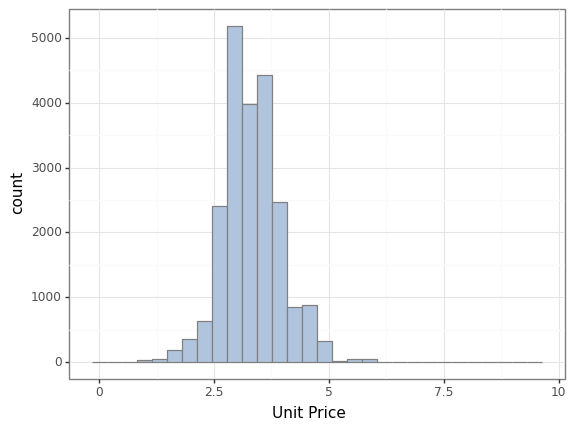

<ggplot: (8776741279091)>

In [87]:
# Histograma de precio unitario
ggplot(data)+geom_histogram(aes(x = 'price_unit'), bins = 30, fill = 'lightsteelblue', color = 'gray')+theme_bw()+labs(x = 'Unit Price')



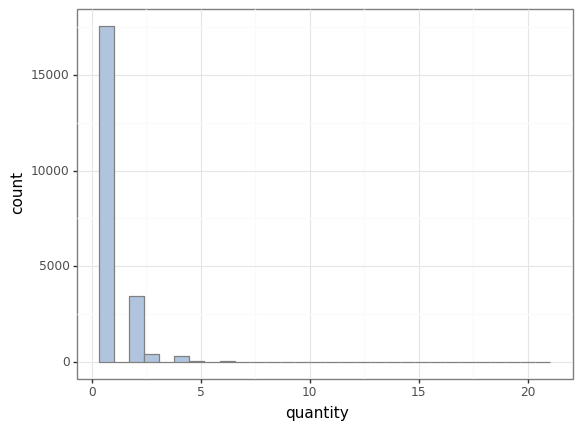

<ggplot: (8776738126583)>

In [88]:
# Histograma de la cantidad demandada 
ggplot(data)+geom_histogram(aes(x = 'quantity'), bins = 30, fill = 'lightsteelblue', color = 'gray')+theme_bw()

### Grafica la q(p). Que tipo de relación parecen tener?

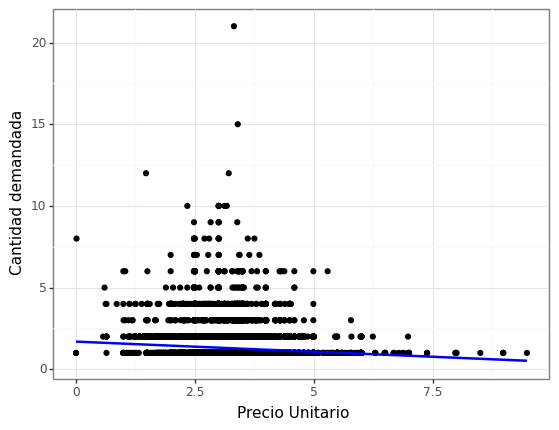

<ggplot: (8776741208049)>

In [89]:
ggplot(data, aes('price_unit', 'quantity'))+geom_point()+geom_smooth(color = 'blue')+theme_bw()+labs(x = 'Precio Unitario', y = 'Cantidad demandada')

### Grafica la misma relación pero ahora entre log(p + 1) y log(q + 1)

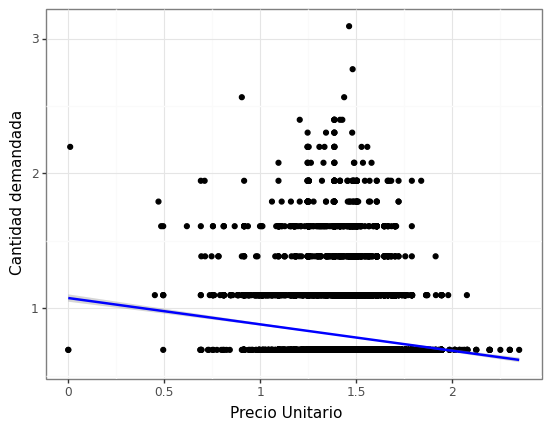

<ggplot: (8776741401082)>

In [90]:
data['log_p'] = np.log(data.price_unit+1)
data['log_q'] = np.log(data.quantity+1)
ggplot(data, aes('log_p', 'log_q'))+geom_point()+geom_smooth(color = 'blue')+theme_bw()+labs(x = 'Precio Unitario', y = 'Cantidad demandada')

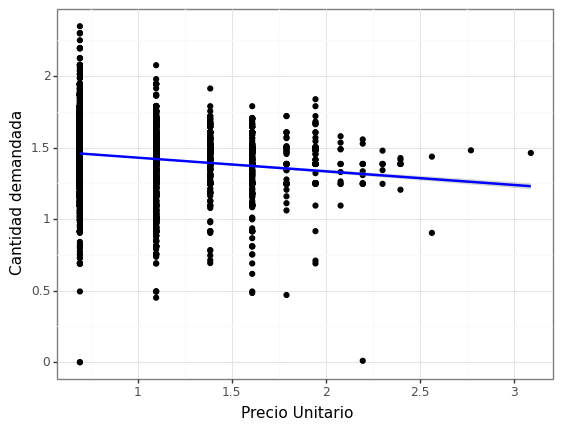

<ggplot: (8776768819167)>

In [91]:
ggplot(data, aes('log_q','log_p'))+geom_point()+geom_smooth(color = 'blue')+theme_bw()+labs(x = 'Precio Unitario', y = 'Cantidad demandada')

### 12. Grafica la curva de demanda por tamaño del helado. Parece haber diferencias en la elasticidad precio dependiendo de la presentación del helado? (2 pts)

La demanda parece ser más elástica para helados más grandes

/Users/isidorogarcia/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/isidorogarcia/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


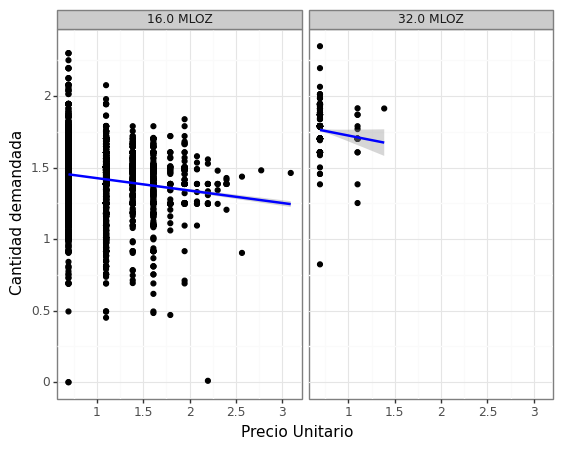

<ggplot: (8776743258365)>

In [92]:
data.describe(include = 'all')
ggplot(data, aes('log_q','log_p'))+geom_point()+geom_smooth(color = 'blue')+theme_bw()+labs(x = 'Precio Unitario', y = 'Cantidad demandada')+facet_wrap(facets = 'size1_descr')

### 13. Grafica la curva de demanda por sabor. Crea una variable con los 3 sabores más populares y agruga el resto de los sabores como ‘otros’. Parece haber diferencias en la elasticidad precio dependiendo del sabor?

El Cherry parece ser el sabor más inelastico

In [93]:
# Top 3 sabores
top_sabores = data.flavor_descr.value_counts()[0:3]

# Data filtrada 
data1 = data[data.flavor_descr.isin(top_sabores.index)]


/Users/isidorogarcia/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/isidorogarcia/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


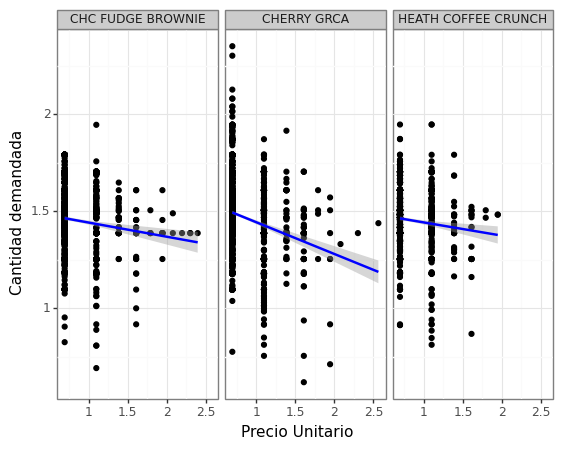

<ggplot: (8776738123852)>

In [94]:
ggplot(data1, aes('log_q','log_p'))+geom_point()+geom_smooth(color = 'blue')+ \
theme_bw()+labs(x = 'Precio Unitario', y = 'Cantidad demandada')+facet_wrap(facets = 'flavor_descr')


## Estimación

### 14. Estima la regresión de la curva de demanda de los helados. Reporta la tabla de la regresión

Algunos tips:
- No olvides borrar la variable que recien creamos de sabores. Incluirla (dado que es perfectamente colineal con flavor), sería una violación a supuesto GM 3 de la regresión.

- No olvides quitar quantity, price_unit, price_deal y otras variables que sirven como identificadora. Tambien quitar fips_state_code y fips_county_code.
- Empecemos con una regresión que incluya a todas las variables.

Nota: La regresión en R entiende que si le metes variables de texto, debe convertirlas a un factor. En algunos otros algoritmos que veremos durante el curso, tendremos que convertir manualmente toda la base a una númerica.

Nota 2: En python, tienes que hacer el numerical encoding incluso para OLS 

In [99]:
# Vectores 
data_estimation = data.drop(['region', 'fips_state_code','size1_descr', 'flavor_descr', 'formula_descr', 
       'type_of_residence', 'age_of_female_head', 'age_of_male_head',
     'age_and_presence_of_children', 'male_head_employment',
     'female_head_employment', 'male_head_education',
     'female_head_education', 'marital_status', 'male_head_occupation' , 'female_head_occupation', 
     'household_composition', 'race', 'price_paid_deal', 'price', 'id', 'quantity', 'price_unit'], axis = 1)


In [104]:
# Endogenous variable
y = data_estimation.log_q

# Controles 
X = data_estimation.drop(['log_q'], axis = 1)
X.columns
X = sm.add_constant(X)

# Corriendo la regresion
fit = sm.OLS(y,X)
results = fit.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_q   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     82.81
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:22:22   Log-Likelihood:                 7708.6
No. Observations:               21940   AIC:                        -1.503e+04
Df Residuals:                   21748   BIC:                        -1.350e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.2220      0.005     42.897      0.000       0.212       0.232
price_paid_non_deal                             0.0618      0.001    110.774      0.000       0.061       0.063
coupon_value                                    0.0023      0.002      1.029      0.304      -0.002       0.007
promotion_type                                  0.1380      0.002     67.359      0.000       0.134       0.142
household_id                                -1.265e-10   1.13e-10     -1.116      0.264   -3.49e-10    9.56e-11
household_size                                  0.0085      0.002      4.553      0.000       0.005       0.012
household_income                            -1.938e-05      0.000     -0.067      0.946      -0.001       0.001
hispanic_origin                                 0.0015      0.006      0.232      0.816      -0.011       0.014
fips_county_code                             1.171e-05   1.63e-05      0.719      0.472   -2.02e-05    4.36e-05
kitchen_appliances                              0.0026      0.001      3.586      0.000       0.001       0.004
tv_items                                       -0.0009      0.002     -0.597      0.551      -0.004       0.002
household_internet_connection                   0.0075      0.003      2.136      0.033       0.001       0.014
region_1                                        0.0533      0.003     15.890      0.000       0.047       0.060
region_2                                        0.0536      0.004     13.836      0.000       0.046       0.061
region_3                                        0.0533      0.003     16.630      0.000       0.047       0.060
region_4                                        0.0619      0.004     16.159      0.000       0.054       0.069
fips_state_code_1                              -0.0073      0.014     -0.519      0.604      -0.035       0.020
fips_state_code_4                               0.0244      0.008      2.878      0.004       0.008       0.041
fips_state_code_5                               0.0342      0.013      2.686      0.007       0.009       0.059
fips_state_code_6                               0.0301      0.005      5.632      0.000       0.020       0.041
fips_state_code_8                              -0.0258      0.008     -3.417      0.001      -0.041      -0.011
fips_state_code_9                               0.0566      0.008      6.937      0.000       0.041       0.073
fips_state_code_10                             -0.0396      0.020     -2.006      0.045      -0.078      -0.001
fips_state_code_11                              0.0392      0.020      1.911      0.056      -0.001       0.079
fips_state_code_12                              0.0207     

### 15 (2 pts). Cuales son los elementos que guarda el objecto de la regresión? Listalos. Cual es el F-test de la regresión? Escribe la prueba de manera matemática (i.e. como la vimos en clase). (Tip: summary(fit) te arroja algo del F-test)

In [114]:
print(results.fvalue)
print(results.f_pvalue)

82.81154793928314
0.0


### 16. Cuál es la elasticidad precio de los helados Ben and Jerry ? Es significativo? Interpreta el coeficiente

$$e_p^Q=-0.34$$ 

Este se interpreta como: Si el precio del helado sube 1%, la cantidad demandada caerá -0.34%. Esto significa que es un bien relativamente inelastico

### 17. Cuántos p-values tenemos en la regresión. Haz un histograma de los p-values.

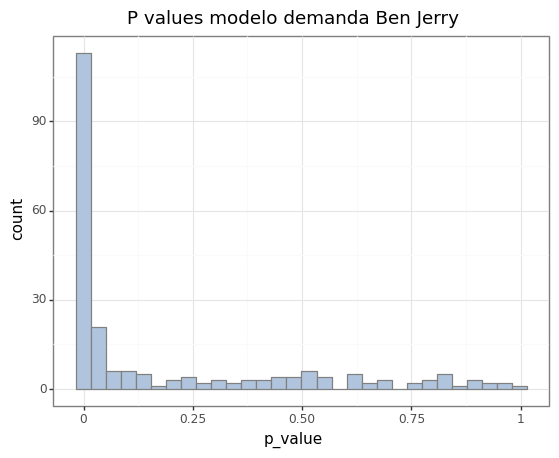

<ggplot: (8776739514420)>

In [130]:
a = results.pvalues
p_values = {'p': results.pvalues.values, 
                        'variable': results.pvalues.index}

p_values = pd.DataFrame(data = p_values)

# Histograma de precio unitario
ggplot(p_values)+geom_histogram(aes(x = 'p'), bins = 30, fill = 'lightsteelblue', color = 'gray')+theme_bw()+labs(x = 'p_value', title = 'P values modelo demanda Ben Jerry')


### 18 (4pts). Realiza un ajuste FDR a una q = 0.10. Grafica el procedimiento (con y sin zoom-in a p-values<0.05). Cuantas variables salían significativas con α = 0.05? Cuantas salen con FDR?

Cuantas salen significativas sin FDR:

In [135]:
print(np.shape(results.pvalues))
a =results.pvalues[results.pvalues<0.05]
print(a)
np.shape(a)

(219,)
const                  0.000000e+00
price_paid_non_deal    0.000000e+00
promotion_type         0.000000e+00
household_size         5.316053e-06
kitchen_appliances     3.366641e-04
                           ...     
race_1                 4.501881e-72
race_2                 4.804190e-36
race_3                 1.435785e-16
race_4                 2.933607e-24
log_p                  0.000000e+00
Length: 134, dtype: float64


(134,)

In [157]:
# Tenemos que crear una variable que refleje el ranking del pvalue de menor a mayor 
# Creando ranking 
p_values = p_values.sort_values(by =['p'])
p_values['ranking'] = np.arange(len(p_values))
p_values.ranking = p_values.ranking+1


# Creando categorica de significante con FDR
p_values['corte_fdr'] = 0.05*p_values.ranking/len(p_values.index)
p_values['sig_fdr'] = np.where(p_values.p<=p_values.corte_fdr, 'Significativa', 'No Significativa')
p_values.sig_fdr.value_counts()

Significativa       119
No Significativa    100
Name: sig_fdr, dtype: int64

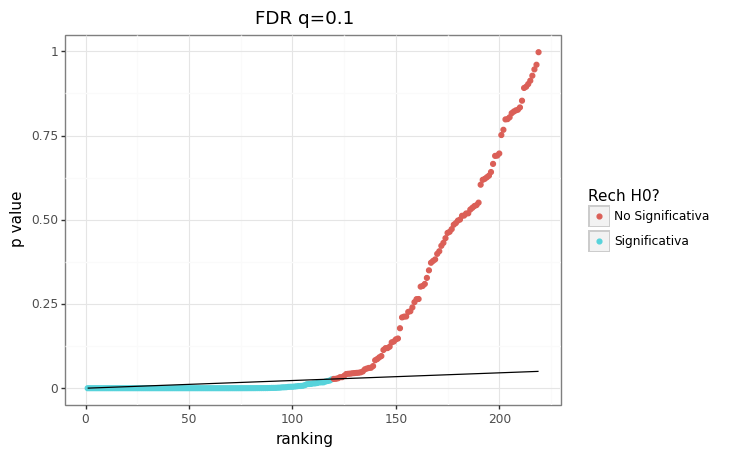

<ggplot: (8776740720824)>

In [158]:
ggplot(p_values, aes('ranking', 'p', color = 'sig_fdr'))+ geom_point()+geom_line(aes('ranking', 'corte_fdr'), color = 'black')+ theme_bw()+labs(title = 'FDR q=0.1', x = 'ranking', y = 'p value', color = 'Rech H0?')


Haciendo Zoom-in

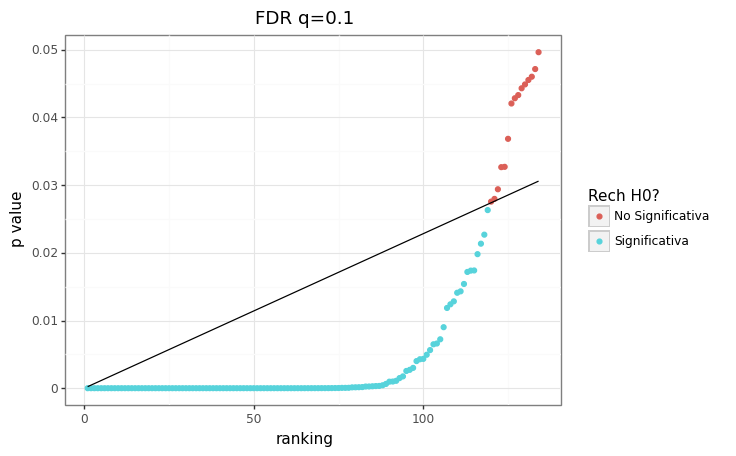

<ggplot: (8776742575776)>

In [159]:
p_values2 = p_values[p_values.p<=0.05]
ggplot(p_values2, aes('ranking', 'p', color = 'sig_fdr'))+ geom_point()+geom_line(aes('ranking', 'corte_fdr'), color = 'black')+ theme_bw()+labs(title = 'FDR q=0.1', x = 'ranking', y = 'p value', color = 'Rech H0?')


### 19 (2pts). Repite el ejercicio pero ahora con Holm-Bonferroni. Comparalo vs FDR. En este caso cuantas variables son significativas? Haz la grafica comparativa (solo con zoom-in)

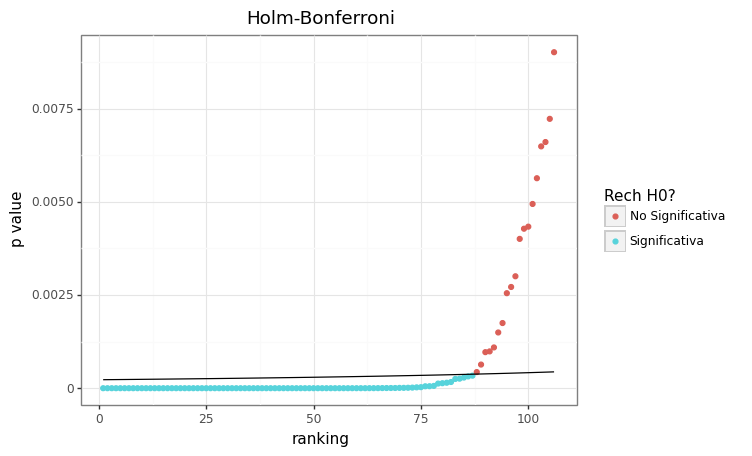

<ggplot: (8776742849223)>

In [163]:
p_values['corte_holm'] = 0.05/(len(p_values.index)+1-p_values.ranking)
p_values['sig_holm'] = np.where(p_values.p<=p_values.corte_holm, 'Significativa', 'No Significativa')

p_values2 = p_values[p_values.p<0.01]

ggplot(p_values2, aes('ranking', 'p', color = 'sig_holm'))+ geom_point()+geom_line(aes('ranking', 'corte_holm'), color = 'black')+ theme_bw()+labs(title = 'Holm-Bonferroni', x = 'ranking', y = 'p value', color = 'Rech H0?')
